<a href="https://colab.research.google.com/github/dayothompson/ML_Project/blob/working_branch/ML_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [55]:
house_info = pd.read_csv("https://dayotestdb.s3.us-east-2.amazonaws.com/calgary_listings.csv")
house_info.head()

,price,postal_code,address,bed,full_bath,half_bath,property_area,property_type,latitude,longitude,year_built,years_old,distance_downtown,monthly_payments
0,329900,T1Y2Z3,4312 49 ST NE,4.0,1.0,1.0,2300.0,house,51.090065,-113.962366,1977.0,43.0,9.274735,1426.53
1,425000,T3L2E7,108 TUSCANY VALLEY DR NW,4.0,2.0,1.0,1336.0,house,51.128175,-114.247503,1998.0,22.0,15.255297,1837.75
2,234900,T3R0V5,2107 - 450 SAGE VALLEY DR NW,2.0,2.0,NaN,835.0,condo,51.179434,-114.158282,2015.0,5.0,16.076061,1015.74
3,369000,T1Y3V2,6852 RUNDLEHORN DR NE,5.0,3.0,NaN,1136.0,house,51.079270,-113.940553,1978.0,42.0,10.076730,1595.60
4,424900,T2X1G2,27 MIDRIDGE CLOSE SE,3.0,2.0,NaN,1055.0,house,50.920030,-114.054980,1978.0,42.0,13.958058,1837.32


## **Analyzing Data**

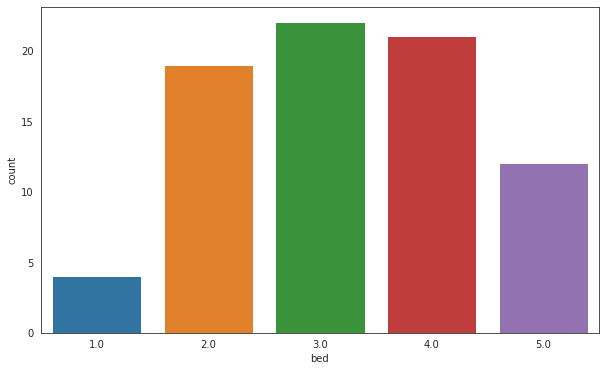

In [57]:
sns.set_style('white')
plt.figure(figsize=(10, 6))
sns.countplot(x="bed", data=house_info)

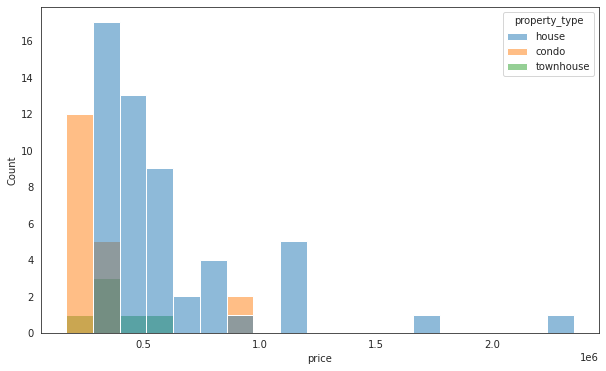

In [61]:
plt.figure(figsize=(10, 6))
sns.histplot(data=house_info, x="price", hue="property_type")

# **Data Wrangling**

In [62]:
house_info.isnull().sum()

price                 0
postal_code           0
address               0
bed                   0
full_bath             0
half_bath            37
property_area         0
property_type         0
latitude              0
longitude             0
year_built            7
years_old             7
distance_downtown     0
monthly_payments      5
dtype: int64

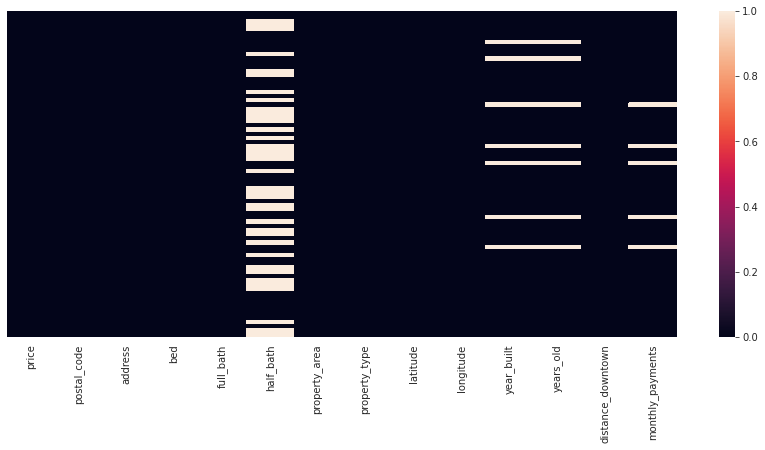

In [63]:
sns.set_style('white')
plt.figure(figsize=(15, 6))
sns.heatmap(data=house_info.isnull(), yticklabels=False)

In [64]:
# Replace nan values with average years_old and 0

house_info['years_old']=house_info['years_old'].replace(np.nan,house_info['years_old'].mean())
house_info['half_bath']=house_info['half_bath'].replace(np.nan,0)

In [65]:
house_info.isnull().sum()

price                0
postal_code          0
address              0
bed                  0
full_bath            0
half_bath            0
property_area        0
property_type        0
latitude             0
longitude            0
year_built           7
years_old            0
distance_downtown    0
monthly_payments     5
dtype: int64

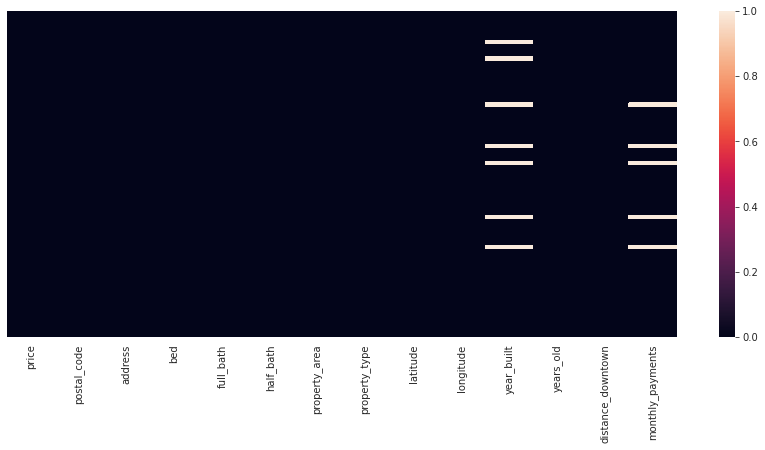

In [66]:
sns.set_style('white')
plt.figure(figsize=(15, 6))
sns.heatmap(data=house_info.isnull(), yticklabels=False)

In [67]:
house_info.head()

,price,postal_code,address,bed,full_bath,half_bath,property_area,property_type,latitude,longitude,year_built,years_old,distance_downtown,monthly_payments
0,329900,T1Y2Z3,4312 49 ST NE,4.0,1.0,1.0,2300.0,house,51.090065,-113.962366,1977.0,43.0,9.274735,1426.53
1,425000,T3L2E7,108 TUSCANY VALLEY DR NW,4.0,2.0,1.0,1336.0,house,51.128175,-114.247503,1998.0,22.0,15.255297,1837.75
2,234900,T3R0V5,2107 - 450 SAGE VALLEY DR NW,2.0,2.0,0.0,835.0,condo,51.179434,-114.158282,2015.0,5.0,16.076061,1015.74
3,369000,T1Y3V2,6852 RUNDLEHORN DR NE,5.0,3.0,0.0,1136.0,house,51.079270,-113.940553,1978.0,42.0,10.076730,1595.60
4,424900,T2X1G2,27 MIDRIDGE CLOSE SE,3.0,2.0,0.0,1055.0,house,50.920030,-114.054980,1978.0,42.0,13.958058,1837.32


# **One-hot encoding**

In [68]:
prop_area = pd.get_dummies(house_info["property_type"])
prop_area.head()

,condo,house,townhouse
0,0,1,0
1,0,1,0
2,1,0,0
3,0,1,0
4,0,1,0


## **Merge tables**

In [69]:
table_df = pd.concat([house_info, prop_area], axis=1)
table_df.head()

,price,postal_code,address,bed,full_bath,half_bath,property_area,property_type,latitude,longitude,year_built,years_old,distance_downtown,monthly_payments,condo,house,townhouse
0,329900,T1Y2Z3,4312 49 ST NE,4.0,1.0,1.0,2300.0,house,51.090065,-113.962366,1977.0,43.0,9.274735,1426.53,0,1,0
1,425000,T3L2E7,108 TUSCANY VALLEY DR NW,4.0,2.0,1.0,1336.0,house,51.128175,-114.247503,1998.0,22.0,15.255297,1837.75,0,1,0
2,234900,T3R0V5,2107 - 450 SAGE VALLEY DR NW,2.0,2.0,0.0,835.0,condo,51.179434,-114.158282,2015.0,5.0,16.076061,1015.74,1,0,0
3,369000,T1Y3V2,6852 RUNDLEHORN DR NE,5.0,3.0,0.0,1136.0,house,51.079270,-113.940553,1978.0,42.0,10.076730,1595.60,0,1,0
4,424900,T2X1G2,27 MIDRIDGE CLOSE SE,3.0,2.0,0.0,1055.0,house,50.920030,-114.054980,1978.0,42.0,13.958058,1837.32,0,1,0


In [71]:
df = table_df[['price', 'bed', 'full_bath', 'half_bath', 'property_area', 'condo',
                 'house', 'townhouse', 'years_old', 'distance_downtown']]
df.head()

,price,bed,full_bath,half_bath,property_area,condo,house,townhouse,years_old,distance_downtown
0,329900,4.0,1.0,1.0,2300.0,0,1,0,43.0,9.274735
1,425000,4.0,2.0,1.0,1336.0,0,1,0,22.0,15.255297
2,234900,2.0,2.0,0.0,835.0,1,0,0,5.0,16.076061
3,369000,5.0,3.0,0.0,1136.0,0,1,0,42.0,10.076730
4,424900,3.0,2.0,0.0,1055.0,0,1,0,42.0,13.958058


## **Train Data**

In [72]:
X = df.drop('price', axis=1)
y = df['price']

In [73]:
# Use train_test_split to create training and testing data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [74]:
# Create the model using LinearRegression

from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [75]:
# Fit the model to the training data and calculate the score for the training data

model.fit(X_train, y_train)
training_score = model.score(X_train, y_train)

print(f"Training Score: {training_score}")

Training Score: 0.6908166391632179


## **Test Data**

In [76]:
# Calculate the score for the testing data

testing_score = model.score(X_test, y_test)
print(f"Testing Score: {testing_score}")

Testing Score: 0.8047344823959057


## **Linear Regression Model**

In [77]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
regr.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [78]:
regr.coef_

array([-44843.84074048, 130082.88095791, -94980.17068683,    446.94079893,
        -7165.64862124,  23112.9263764 , -15947.27775516,    383.64304873,
       -16590.46192107])

In [79]:
regr.intercept_

-55397.261219654

In [80]:
# Predict the price of a townhouse with the following feature

# bed = 3
# full_bath = 2
# half_bath = 0
# property_area = 1500
# years_old = 15
# distance_downtown = 12.554

regr.predict([[3, 2, 0, 1500, 0, 0, 1, 15, 12.554]])

array([522178.88589027])

In [81]:
# Another sample

regr.predict([[3, 3, 0, 1200, 0, 0, 1, 15, 14.2]])

array([490871.62684671])

Text(0.5, 1.0, 'Residual Plot')

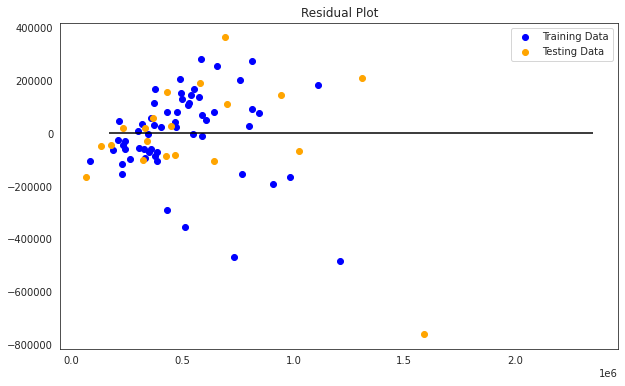

In [86]:
# Plot the Residuals for the Training and Testing data

plt.figure(figsize=(10, 6))
plt.scatter(model.predict(X_train), model.predict(X_train) - y_train, c="blue", label="Training Data")
plt.scatter(model.predict(X_test), model.predict(X_test) - y_test, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y.min(), xmax=y.max())
plt.title("Residual Plot")